<a href="https://colab.research.google.com/github/Poojitha20-B/Internship/blob/main/XOR_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# XOR input and labels
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [13]:
np.random.seed(42)
input_size = 2
hidden_size = 4
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))



In [15]:
lr = 0.1
epochs = 10000

for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = sigmoid(z2)

    # Loss (Binary Cross-Entropy)
    loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

    # Backward pass
    dz2 = y_pred - y
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * sigmoid_deriv(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} Loss: {loss:.4f}")


Epoch 0 Loss: 0.7628
Epoch 1000 Loss: 0.2152
Epoch 2000 Loss: 0.0245
Epoch 3000 Loss: 0.0101
Epoch 4000 Loss: 0.0059
Epoch 5000 Loss: 0.0040
Epoch 6000 Loss: 0.0030
Epoch 7000 Loss: 0.0024
Epoch 8000 Loss: 0.0020
Epoch 9000 Loss: 0.0017


In [17]:
print("\nPredictions after training:")
print(np.round(y_pred))



Predictions after training:
[[0.]
 [1.]
 [1.]
 [0.]]


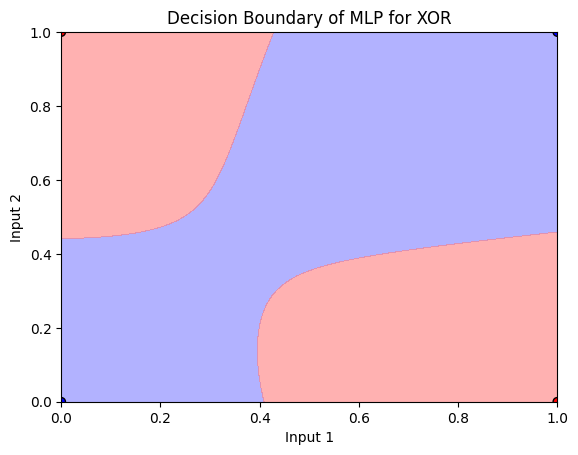

In [18]:
# Meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
grid = np.c_[xx.ravel(), yy.ravel()]
z1_grid = grid @ W1 + b1
a1_grid = sigmoid(z1_grid)
z2_grid = a1_grid @ W2 + b2
preds = sigmoid(z2_grid).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap='bwr', alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y.ravel(), edgecolors='k', cmap='bwr')
plt.title("Decision Boundary of MLP for XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()